In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip "/content/drive/My Drive/ML/Plant_disease_final.zip"

Archive:  /content/drive/My Drive/ML/Plant_disease_final.zip
replace Plant_disease/Pepper__bell___Bacterial_spot/01dfb88b-cd5a-420c-b163-51f5fe07b74d___JR_B.Spot 9091.JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace Plant_disease/Pepper__bell___Bacterial_spot/01dfb88b-cd5a-420c-b163-51f5fe07b74d___JR_B.Spot 9091.JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Plant_disease/Pepper__bell___Bacterial_spot/01dfb88b-cd5a-420c-b163-51f5fe07b74d___JR_B.Spot 9091.JPG  
  inflating: Plant_disease/Pepper__bell___Bacterial_spot/01ebc916-4793-40a3-b5e4-a32687e4fa3d___NREC_B.Spot 9125.JPG  
  inflating: Plant_disease/Pepper__bell___Bacterial_spot/0c2392f6-3e69-4baf-b9f3-197623f6631a___JR_B.Spot 3176.JPG  
  inflating: Plant_disease/Pepper__bell___Bacterial_spot/0c6f6805-490e-438c-b9cd-3fd7ee29f31b___NREC_B.Spot 9123.JPG  
  inflating: Plant_disease/Pepper__bell___Bacterial_spot/0c99cb45-b4e0-4ade-bba5-fab3b678f0bb___JR_B.Spot 8912.JPG  
  inflating: Plant_

In [ ]:
import numpy as np
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd


Using TensorFlow backend.


In [ ]:
image_list_a, label_list = [], []

totalImage = 0  # it is used to control total numbe of images for each class

root_dir = listdir("/content/Plant_disease/") # Specify location of plant images

for image_folder in root_dir :  # Look for each folder
    # Look for All images in each folder
    image_list = listdir(f"/content/Plant_disease/{image_folder}")
    
    for image in image_list:
        # Read each image in a variable image_list_a and 
        #correspoding folder name as image lable
        
        image_name = f"/content/Plant_disease/{image_folder}/"+image
        if isinstance(image_name, str) == True:
            if image_name.endswith(".jpg") == True or image_name.endswith(".JPG") == True:
                image=cv2.imread(image_name)
                image=cv2.resize(image,(256,256)).flatten()
                image_list_a.append(image)
                label_list.append(image_folder)


image_list_a=np.array(image_list_a, dtype="float")/255.0

            

In [ ]:
(trainX, testX, trainY, testY) = train_test_split(image_list_a, label_list, test_size=0.2, random_state=42)

In [ ]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)  
testY = lb.transform(testY)    

In [ ]:
model=Sequential()
model.add(Dense(units=32, activation='sigmoid', input_shape=(196608,)))
model.add(Dense(units=15, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                6291488   
_________________________________________________________________
dense_2 (Dense)              (None, 15)                495       
Total params: 6,291,983
Trainable params: 6,291,983
Non-trainable params: 0
_________________________________________________________________


In [ ]:
EPOCHS = 10
INIT_LR = 1e-3
BS = 32
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

In [ ]:
history = model.fit(trainX, trainY, batch_size=32,
    validation_data=(testX, testY),
    epochs=EPOCHS, verbose=1
    )

Train on 240 samples, validate on 60 samples
Epoch 1/10
240/240 [==============================] - 1s 6ms/step - loss: 0.2959 - accuracy: 0.9333 - val_loss: 0.2741 - val_accuracy: 0.9333
Epoch 2/10
240/240 [==============================] - 1s 4ms/step - loss: 0.2905 - accuracy: 0.9333 - val_loss: 0.2688 - val_accuracy: 0.9333
Epoch 3/10
240/240 [==============================] - 1s 4ms/step - loss: 0.2843 - accuracy: 0.9333 - val_loss: 0.2645 - val_accuracy: 0.9333
Epoch 4/10
240/240 [==============================] - 1s 4ms/step - loss: 0.2789 - accuracy: 0.9333 - val_loss: 0.2610 - val_accuracy: 0.9333
Epoch 5/10
240/240 [==============================] - 1s 4ms/step - loss: 0.2745 - accuracy: 0.9333 - val_loss: 0.2582 - val_accuracy: 0.9333
Epoch 6/10
240/240 [==============================] - 1s 4ms/step - loss: 0.2707 - accuracy: 0.9333 - val_loss: 0.2559 - val_accuracy: 0.9333
Epoch 7/10
240/240 [==============================] - 1s 4ms/step - loss: 0.2674 - accuracy: 0.9333 - v

In [ ]:
model.evaluate(testX, testY)

60/60 [==============================] - 0s 1ms/step


[0.25026795566082, 0.9333333373069763]

In [ ]:
def create_dense(layer_sizes):
    model = Sequential()
    model.add(Dense(layer_sizes[0], activation='sigmoid', input_shape=(196608,)))

    for s in layer_sizes[1:]:
        model.add(Dense(units = s, activation = 'sigmoid'))

    model.add(Dense(units=15, activation='softmax'))

    return model

def evaluate(model, batch_size=128, epochs=5):
    model.summary()
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(trainX, trainY, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=False)
    loss, accuracy  = model.evaluate(testX, testY, verbose=False)
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()

    print()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                6291488   
_________________________________________________________________
dense_4 (Dense)              (None, 15)                495       
Total params: 6,291,983
Trainable params: 6,291,983
Non-trainable params: 0
_________________________________________________________________


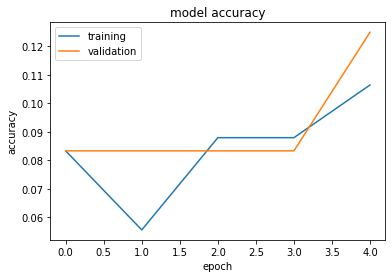


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                6291488   
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 15)                495       
Total params: 6,293,039
Trainable params: 6,293,039
Non-trainable params: 0
_________________________________________________________________


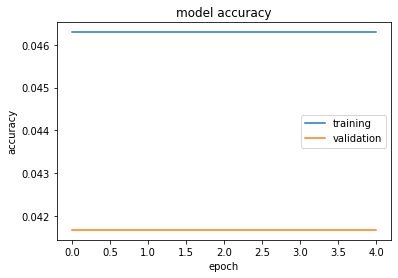


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 32)                6291488   
_________________________________________________________________
dense_9 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_11 (Dense)             (None, 15)                495       
Total params: 6,294,095
Trainable params: 6,294,095
Non-trainable params: 0
_________________________________________________________________


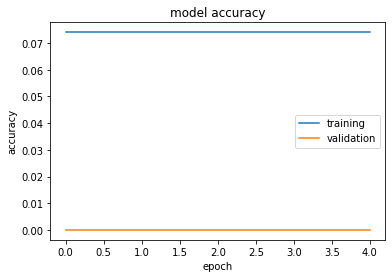


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 32)                6291488   
_________________________________________________________________
dense_13 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_14 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_15 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_16 (Dense)             (None, 15)                495       
Total params: 6,295,151
Trainable params: 6,295,151
Non-trainable params: 0
_________________________________________________________________


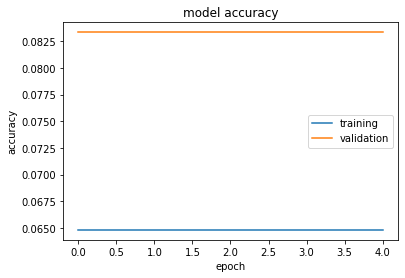

In [ ]:
for layers in range(1, 5):
    model = create_dense([32] * layers)
    evaluate(model)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 32)                6291488   
_________________________________________________________________
dense_18 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_19 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_20 (Dense)             (None, 15)                495       
Total params: 6,294,095
Trainable params: 6,294,095
Non-trainable params: 0
_________________________________________________________________


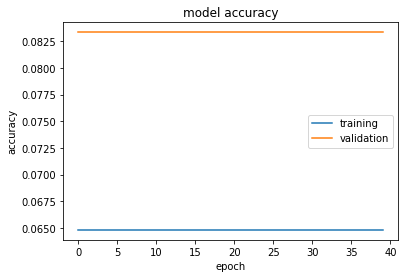

In [ ]:
model = create_dense([32, 32, 32])
evaluate(model, epochs=40)

# **Comparing Number Of Nodes Per Layer**

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 32)                6291488   
_________________________________________________________________
dense_22 (Dense)             (None, 15)                495       
Total params: 6,291,983
Trainable params: 6,291,983
Non-trainable params: 0
_________________________________________________________________


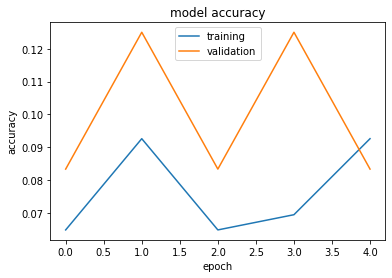


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 64)                12582976  
_________________________________________________________________
dense_24 (Dense)             (None, 15)                975       
Total params: 12,583,951
Trainable params: 12,583,951
Non-trainable params: 0
_________________________________________________________________


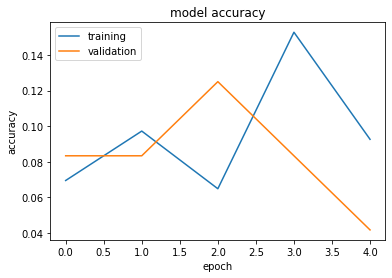


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 128)               25165952  
_________________________________________________________________
dense_26 (Dense)             (None, 15)                1935      
Total params: 25,167,887
Trainable params: 25,167,887
Non-trainable params: 0
_________________________________________________________________


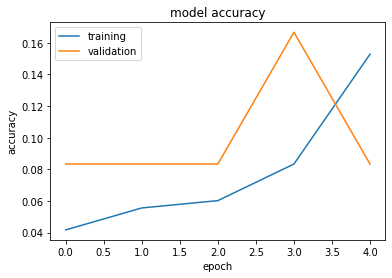


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 256)               50331904  
_________________________________________________________________
dense_28 (Dense)             (None, 15)                3855      
Total params: 50,335,759
Trainable params: 50,335,759
Non-trainable params: 0
_________________________________________________________________


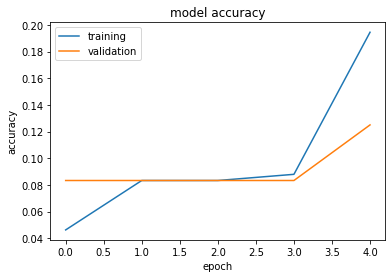


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 512)               100663808 
_________________________________________________________________
dense_30 (Dense)             (None, 15)                7695      
Total params: 100,671,503
Trainable params: 100,671,503
Non-trainable params: 0
_________________________________________________________________


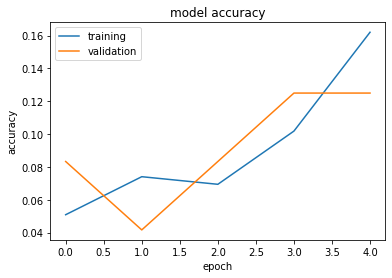


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 1024)              201327616 
_________________________________________________________________
dense_32 (Dense)             (None, 15)                15375     
Total params: 201,342,991
Trainable params: 201,342,991
Non-trainable params: 0
_________________________________________________________________


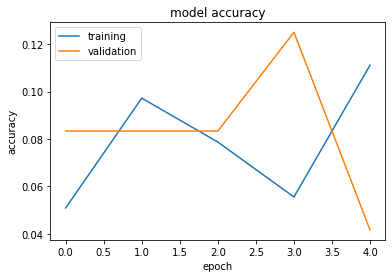


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 2048)              402655232 
_________________________________________________________________
dense_34 (Dense)             (None, 15)                30735     
Total params: 402,685,967
Trainable params: 402,685,967
Non-trainable params: 0
_________________________________________________________________


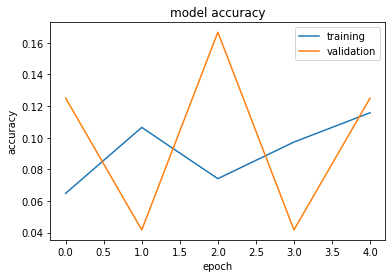

In [ ]:
for nodes in [32, 64, 128, 256, 512, 1024, 2048]:
    model = create_dense([nodes])
    evaluate(model)

#  Adding More Nodes And More Layers
As earlier we have add the number of nodes and the number of layers in an isolated context, lets check  what happens as we combine both approaches.

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 32)                6291488   
_________________________________________________________________
dense_36 (Dense)             (None, 15)                495       
Total params: 6,291,983
Trainable params: 6,291,983
Non-trainable params: 0
_________________________________________________________________


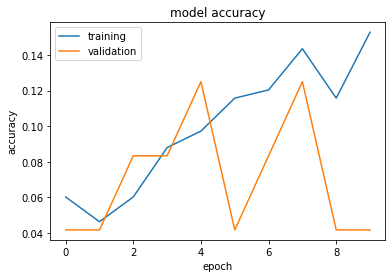


Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 32)                6291488   
_________________________________________________________________
dense_38 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_39 (Dense)             (None, 15)                495       
Total params: 6,293,039
Trainable params: 6,293,039
Non-trainable params: 0
_________________________________________________________________


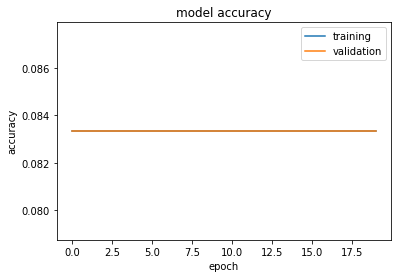


Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 32)                6291488   
_________________________________________________________________
dense_41 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_42 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_43 (Dense)             (None, 15)                495       
Total params: 6,294,095
Trainable params: 6,294,095
Non-trainable params: 0
_________________________________________________________________


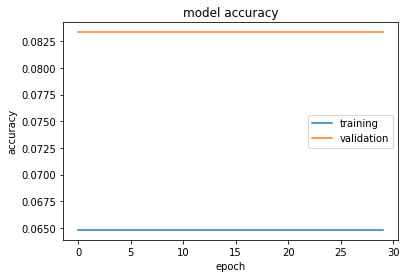


Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 32)                6291488   
_________________________________________________________________
dense_45 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_46 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_47 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_48 (Dense)             (None, 15)                495       
Total params: 6,295,151
Trainable params: 6,295,151
Non-trainable params: 0
_________________________________________________________________


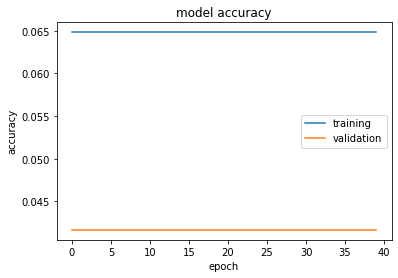


Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 32)                6291488   
_________________________________________________________________
dense_50 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_51 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_52 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_53 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_54 (Dense)             (None, 15)                495       
Total params: 6,296,207
Trainable params: 6,296,207
Non-trainable params: 0
__________________________________________

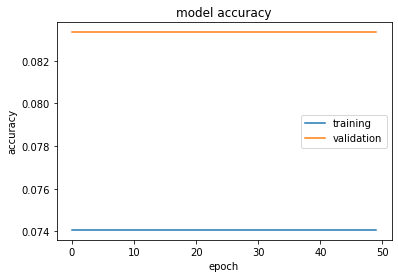

In [ ]:
nodes_per_layer = 32
for layers in [1, 2, 3, 4, 5]:
    model = create_dense([nodes_per_layer] * layers)
    evaluate(model, epochs=10*layers)

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 128)               25165952  
_________________________________________________________________
dense_56 (Dense)             (None, 15)                1935      
Total params: 25,167,887
Trainable params: 25,167,887
Non-trainable params: 0
_________________________________________________________________


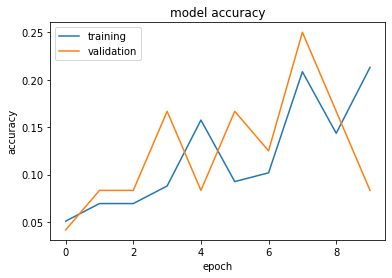


Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 128)               25165952  
_________________________________________________________________
dense_58 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_59 (Dense)             (None, 15)                1935      
Total params: 25,184,399
Trainable params: 25,184,399
Non-trainable params: 0
_________________________________________________________________


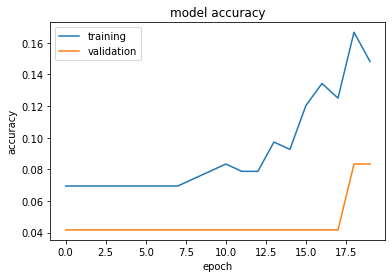


Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 128)               25165952  
_________________________________________________________________
dense_61 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_62 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_63 (Dense)             (None, 15)                1935      
Total params: 25,200,911
Trainable params: 25,200,911
Non-trainable params: 0
_________________________________________________________________


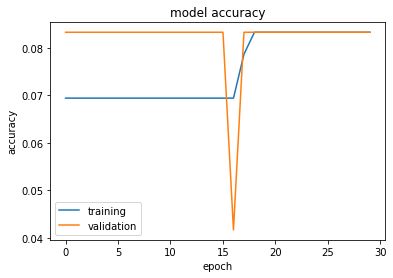


Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 128)               25165952  
_________________________________________________________________
dense_65 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_66 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_67 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_68 (Dense)             (None, 15)                1935      
Total params: 25,217,423
Trainable params: 25,217,423
Non-trainable params: 0
_________________________________________________________________


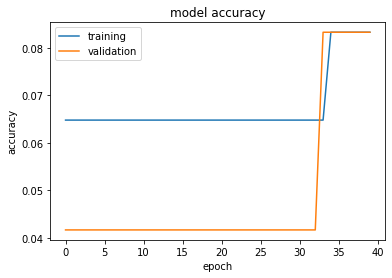


Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 128)               25165952  
_________________________________________________________________
dense_70 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_71 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_72 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_73 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_74 (Dense)             (None, 15)                1935      
Total params: 25,233,935
Trainable params: 25,233,935
Non-trainable params: 0
________________________________________

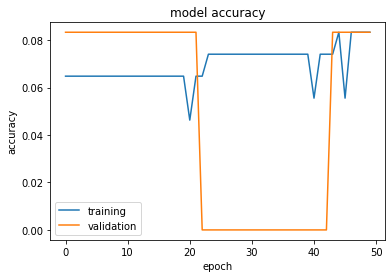

In [ ]:
nodes_per_layer = 128
for layers in [1, 2, 3, 4, 5]:
    model = create_dense([nodes_per_layer] * layers)
    evaluate(model, epochs=10*layers)

# Longer Chains, More Training, Smaller Batches
Sometimes models with several layers need to not only train for longer, but also need more corrections per epoch. By decreasing the batch size, we can increase the number of overall corrections that a model gets. We also ensure it gets more fine grained information by adjusting to error over smaller batches

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_75 (Dense)             (None, 32)                6291488   
_________________________________________________________________
dense_76 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_77 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_78 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_79 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_80 (Dense)             (None, 15)                495       
Total params: 6,296,207
Trainable params: 6,296,207
Non-trainable params: 0
___________________________________________

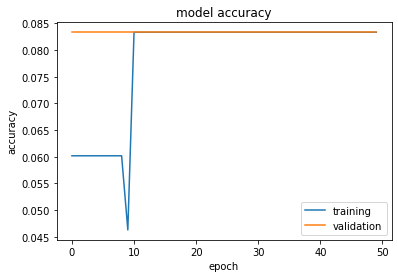

In [ ]:
model = create_dense([32] * 5)
evaluate(model, batch_size=16, epochs=50)